# Current Trends in AI
_Friday, November 13 2020_  
This notebook was created to facilitate the presentation at the "Builders and Makers" Minneapolis Meetup.  
Meetup Link [Click Here](https://www.meetup.com/builders-and-makers/events/273681558/)

__About Me:__  
My name is James Inlow, I currently work as a data scientist at LexisNexis Risk Solutions. Most of my work is focused around the credit risk space, creating machine learning models that will help with loan decisioning and marketing.

## Overview

<img src="resources/AI_Word_Cloud.png" width="500">
    
In this notebook we will go over three of the most popular artificial intelligence (AI) approaches currently being used in the wild. We will try to specifically address, in which scenario is one method better than another.  

### The Value Statement

We will be focusing on a subset of AI known as machine learning. Machine learning is the study of creating algorithms that improve with experience. Generally these algorithms are used to automate answering a question you need to ask repeatedly.
 - How likely is it that this person will pay back their auto loan?
 - Is this a picture of a dog or a cat?
 - Will this airline flight be late?
 - How much is this car worth?
 - What add is a specific person most likely to interact with?
 - What song will a person like to hear after the current one finishes?
 - What web page best answers the users searched question?
 
Being able to answer these questions quickly, and without human intervention provides a massive amount of value to a business. Additionally, often times these questions could not realistically be answered by a human in a reliable timely fashion.  

The act of teaching the algorithm how to answer these questions is referred as training. The algorithms themselves are referred to as models. 

### Back to Basics (i.e. what is this witchcraft?)
At it's heart a machine learning model is a function that takes some data as input and outputs something that has value for your use case.    

<img src="resources/AI_Trends_Chat/Machine_Learning_Model_Function.png" width=700>

The number, or numbers, being output is what is used to answer your question (the probability that this image is a dog, a persons estimated income, ranking of web pages). The model, takes your input data, and transforms this it into your output.

The real power of machine learning is that the model is taught, or trained, to recognize how patterns in your data can be used to create an educated guess to answer your question.  

You train your machine learning model, using data where you know the answer to your question. This allows your model to learn on real outcomes, and then you can use a portion of this data to test how well your model will perform on new data in production.

### A Note About the Data
In machine learning all of the data you will work with can largely be classified into two categories structured and unstructured. Different machine learning approaches are better suited for these two different kinds of data. 

#### Structured Data
Structured data, is data that has a predetermined layout and data types. The easiest example of this is a table, or excel spreadsheet. Any information that you can describe in this tabular fashion is generally what people mean when they say structured data. Examples are financial data, transaction information, stock prices, time series data, data tied to a user. Structured data is generally easier to use in machine learning because machine learning algorithms need data to be in a standardized form. By definition structured data has a predefined layout, and is many times in numerical form and already almost a matrix. Thus, going from the data into the machine learning algorithm is relatively easy.

In [1]:
import seaborn as sns

mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Unstructured Data
Unstructured data is data that does not have a clean layout. This is data that is free form, for example images, text, or audio. Unstructured data usually requires more work to get it into a form that can be used by a machine learning algorithm. Additionally the relationships between the unstructured data and your outcome you are trying to predict can be more ambiguous.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
friar = Image.open("data/friar_small.jpg")
friar_np = np.array(friar)

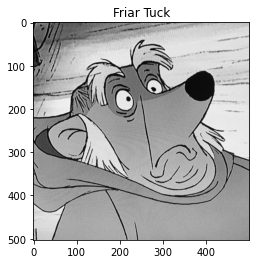

In [4]:
plt.title(f"Friar Tuck")
plt.imshow(friar_np)
plt.show()

## The Trends
At this point we will go over three types of models that I would consider to be the pillar stones of modern machine learning, and currently the most widely used algorithms.
 - Regression
 - Decision Tree Models
 - Neural Networks

### Regression (the ol' staple)
Regression is still one of the most commonly used machine learning algorithms, and is one of the most explainable methods. For this reason regression is still heavily used in highly regulated spaces, such as banking, where explainability is paramount. Additionally, regression will often perform pretty well, even when there is not a lot of data available.

Regression is used to determine the relationship between your independent variable (the outcome you are predicting) and your dependent variables (your input variables).

You could make the argument that all predictive machine learning algorithms boil down to this same definition, but regression does it in one of the more straightforward ways.

For simplicity we will think about a regression algorithm, where you use one variable, to predict another. For example, consider trying to predict the average miles per gallon a car gets, using it's horsepower as the input.

What regression does, is estimates a one to one mapping relationship between the two variables. It does this by fitting a line such that, on average, the distance between that line and every data point is minimized.

In [24]:
import altair as alt
import pandas as pd
from altair import datum

In [6]:
chart = alt.Chart(mpg).mark_circle(size=60).encode(x="mpg", y="horsepower")
reg_line = chart.transform_regression("mpg", "horsepower").mark_line(color="orange")
params = (
    alt.Chart(mpg)
    .transform_regression("mpg", "horsepower", params=True)
    .transform_calculate(coef='"Coefficient: " + round(datum.coef[1], 4)')
    .mark_text(align="right", size=14)
    .encode(x=alt.value(375), y=alt.value(20), text="coef:N")
)
chart + reg_line + params

alt.LayerChart(...)

In the above plot, regression is used to create the orange line. The coefficient is the number that describes the relationship between the two variables. In this case, on average a one unit increase in a cars average miles per gallon, is associated with decrease in a cars horsepower of 4 units.  
So if you told me your car an average got 25 miles to the gallon. Using this model, I would predict that it had a roughly had a horsepower of 100.

#### It's as easy as...

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Create a development sample (data you train the model with), and a validation sample (data you test the model with).  
Just to make things easier, we are only going to use the numeric variables for this model.

In [53]:
X_dev, X_val, y_dev, y_val = train_test_split(
    mpg.select_dtypes(["float64", "int64"]).drop("mpg", axis=1),
    mpg["mpg"],
    test_size=0.5,
    random_state=123,
)

Some simple data processing, filling missing values.

In [54]:
mean_imputer = SimpleImputer().fit(X_dev)
X_dev = mean_imputer.transform(X_dev)
X_val = mean_imputer.transform(X_val)

Train the model, and look at the coefficients.

In [55]:
lr_mod = LinearRegression().fit(X_dev, y_dev)
pd.DataFrame(lr_mod.coef_).T.rename(
    columns={i: col for i, col in enumerate(lr_X.columns)}
)

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0.206408,-0.004502,0.022941,-0.007275,0.27967,0.790153


Predict with our model on a new dataset.

In [62]:
preds = lr_mod.predict(X_val)

Take a look at performance.

In [64]:
np.sqrt(mean_squared_error(y_val, preds))

3.418546019758658

The above number means, on average our model will be off by as much as 3.4 miles per gallon.  
So with this extremely simple model, we are able to predict a cars miles per gallon with decent accuracy.

#### Why you should care about regression...
Finally let's go over some of the key reasons regression is still relevant, and some of the use cases that this algorithm would make the most sense in.
  - __Ubiquitous__: Many algorithms use regression under the hood in some way, forming a base understanding of it is a great building block.
  - __Simple__: A calculated regression model is fast and often simple, being simple usually translate to low latency.
  - __Easier to put into production__: If you have python already built into your production tech stack, this may not matter as much. But if you rely on any language conversion, regression is simple enough that this can be a little more painless.
  - __Data Type__: You are using structured data.
  - __Understandable Data Relationships__: The relationship between what you are predicting and your input data is simple, i.e. horsepower goes up, miles per gallon goes down. 
  - __The Need for Complete Transparency__: With regression you can tell precisely how your data inputs, will impact your models predictions. If you need transparency in a model (sometimes referred to as a white-box model), regression is going to give you just that.

### Decision Tree Models (you go right, or you go left)
Decision tree modeling has become one of the most powerful tools for creating fast, robust and accurate model to use alongside structured data. Decision tree based models are the leading algorithms in many tabular data competitions on [kaggle.com](kaggle.com).  
Decision tree based models are generally more accurate than standard regression models, but they are also usually more complex. Because of this, it is often much harder to interpret how the model is using the input data to predict your outcome.  
At it's core a decision tree can be best explained simply using it's name. It's a modeling method that creates a tree of decisions that are used to make a prediction. To visualize this, we will use the ubiquitious toy titanic dataset. We will predict if a person survived the fateful titanic voyage.

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
titanic = sns.load_dataset("titanic")

In [68]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


We will do some quick preprocessing with this data, convert character fields to numeric by converting each level to a number, and then filling missing data.

In [136]:
itc_df = titanic.select_dtypes(["int64", "float64"])
itc = SimpleImputer().fit_transform(itc_df)

In [141]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=123).fit(itc[:, 1:], itc[:, 0])

In [142]:
from sklearn.tree import plot_tree

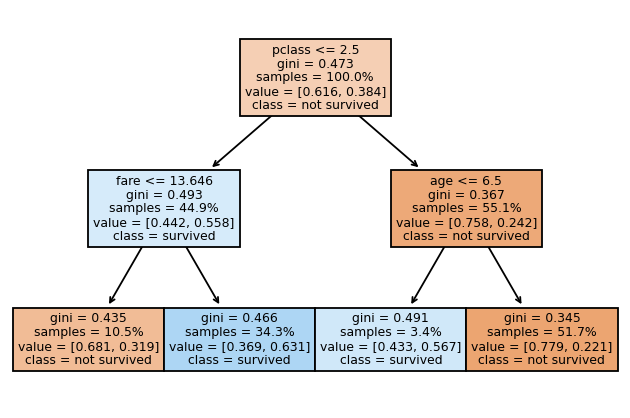

In [143]:
plt.figure(dpi=130)
cn = ["not survived", "survived"]
fn = itc_df.columns[1:]
plot_tree(dtree, class_names=cn, feature_names=fn, filled=True, proportion=True);

As you can see, the different variable levels are combined to make the different decision levels. 